# **Adiabatic Quantum Annealing**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Antoine Jacquier, 2023. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display
from sympy.physics.quantum import TensorProduct
from sympy import symbols
from matplotlib import pyplot as plt

# The 1-bit Disagree problem

### No commuting Hamiltonians

In [2]:
def fp_ok(t):
    return (1+np.sqrt(1-2*t*(1-t))) / 2.

def fm_ok(t):
    return (1-np.sqrt(1-2*t*(1-t))) / 2.

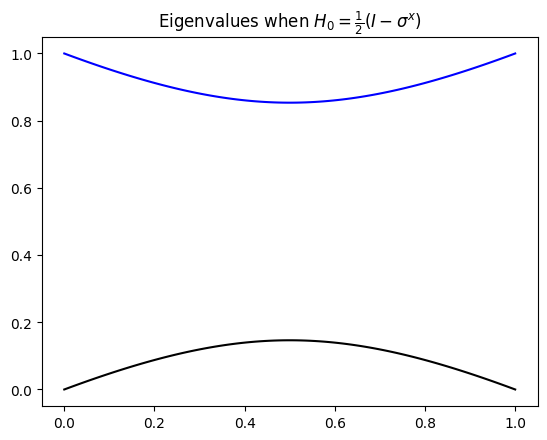

In [3]:
tt = np.linspace(0., 1., 100)
ffp = fp_ok(tt)
ffm = fm_ok(tt)
plt.plot(tt, ffp, 'b')
plt.plot(tt, ffm, 'k')
plt.title(r"Eigenvalues when $H_0 = \frac{1}{2}(I-\sigma^x)$")
plt.savefig("OneBitDisagreeFine.eps")
plt.show()

### Commuting Hamiltonians

In [4]:
def fp_problem(t):
    return t

def fm_problem(t):
    return 1-t

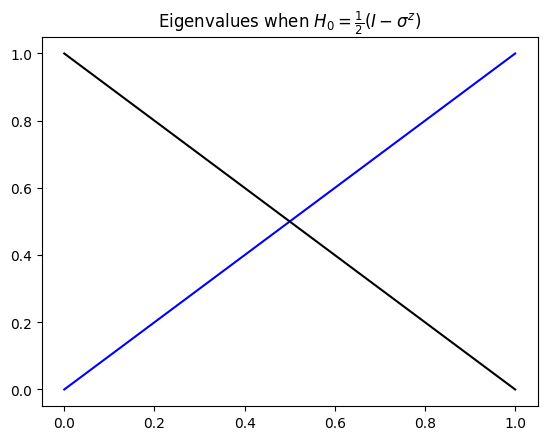

In [5]:
tt = np.linspace(0., 1., 100)
ffp = fp_problem(tt)
ffm = fm_problem(tt)
plt.plot(tt, ffp, 'b')
plt.plot(tt, ffm, 'k')
plt.title(r"Eigenvalues when $H_0 = \frac{1}{2}(I-\sigma^z)$")
plt.savefig("OneBitDisagreePb.eps")
plt.show()

### Commuting Hamiltonians -- adding noise

In [6]:
def fp_problem_eps(t, eps):
    return .5 + np.sqrt(4*eps**2*t**4 - 8*eps**2*t**3 + 4*eps**2*t**2 + 4*t**2 - 4*t + 1)/2.

def fm_problem_eps(t, eps):
    return .5 - np.sqrt(4*eps**2*t**4 - 8*eps**2*t**3 + 4*eps**2*t**2 + 4*t**2 - 4*t + 1)/2.

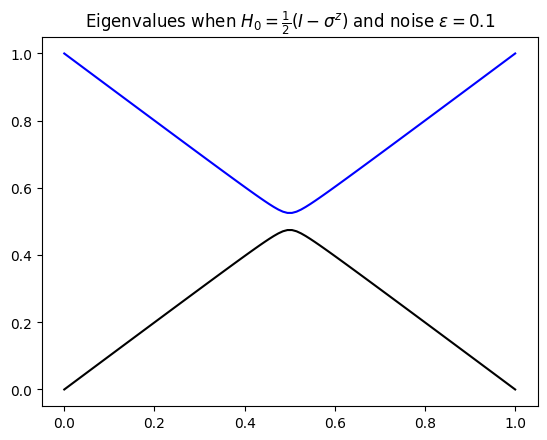

In [7]:
eps = 0.1
tt = np.linspace(0., 1., 100)
ffp = fp_problem_eps(tt, eps)
ffm = fm_problem_eps(tt, eps)
plt.plot(tt, ffp, 'b')
plt.plot(tt, ffm, 'k')
plt.title(r"Eigenvalues when $H_0 = \frac{1}{2}(I-\sigma^z)$ and noise $\epsilon=$%.1f"  %eps)
plt.savefig("OneBitDisagreePbNoise.eps")
plt.show()

# The 2-bit Disagree problem

## Initialisation of the system: initial and terminal Hamiltonians

In [8]:
I = sym.Matrix([[1, 0],  [0, 1]])
X = sym.Matrix([[0, 1],  [1, 0]])
Z = sym.Matrix([[1, 0],  [0, -1]])

HF = (TensorProduct(I,I) + TensorProduct(Z, I)*TensorProduct(I, Z)) / 2

H0 = ((TensorProduct(I, I) - TensorProduct(X,I)) + (TensorProduct(I, I) - TensorProduct(I,X))) / 2
sym.pprint("Initial Hamiltonian (H0)= ")
sym.pprint(H0)
sym.pprint("  ")

sym.pprint("Final Hamiltonian (HF): ")
sym.pprint(HF)


sym.pprint("  ")
print("Eigenvalues, eigenvectors of H0 (with their algebraic multiplicity): ")
ev = H0.eigenvects()
sym.pprint(ev)


sym.pprint("  ")
print("Eigenvalues, eigenvectors of HF (with their algebraic multiplicity): ")
ev = HF.eigenvects()
sym.pprint(ev)

Initial Hamiltonian (H0)= 
⎡ 1    -1/2  -1/2   0  ⎤
⎢                      ⎥
⎢-1/2   1     0    -1/2⎥
⎢                      ⎥
⎢-1/2   0     1    -1/2⎥
⎢                      ⎥
⎣ 0    -1/2  -1/2   1  ⎦
  
Final Hamiltonian (HF): 
⎡1  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  1⎦
  
Eigenvalues, eigenvectors of H0 (with their algebraic multiplicity): 
⎡⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡0 ⎤  ⎡-1⎤⎤⎞  ⎛      ⎡⎡1 ⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢-1⎥  ⎢0 ⎥⎥⎟  ⎜      ⎢⎢-1⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢ ⎥⎥⎟, ⎜1, 2, ⎢⎢  ⎥, ⎢  ⎥⎥⎟, ⎜2, 1, ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢1⎥⎥⎟  ⎜      ⎢⎢1 ⎥  ⎢0 ⎥⎥⎟  ⎜      ⎢⎢-1⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0 ⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠⎦
  
Eigenvalues, eigenvectors of HF (with their algebraic multiplicity): 
⎡⎛      ⎡⎡0⎤  ⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥  ⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢ ⎥⎥⎟⎥
⎢⎜      ⎢⎢1⎥  ⎢0⎥⎥⎟  ⎜      ⎢⎢0⎥  ⎢0⎥⎥⎟⎥
⎢⎜0, 2, ⎢⎢ ⎥, ⎢ ⎥⎥⎟, ⎜1, 2, ⎢⎢ ⎥

### Computing the Lie bracket

In [9]:
H0*HF - HF*H0

Matrix([
[   0, 1/2, 1/2,    0],
[-1/2,   0,   0, -1/2],
[-1/2,   0,   0, -1/2],
[   0, 1/2, 1/2,    0]])

## Time-dependent Hamiltonian

In [10]:
t = symbols('t', real=True)
#z = symbols('z', real=True)

## Time-dependent Hamiltonian
def H(t):
    return (1-t)*H0 + t*HF

In [11]:
sym.pprint(H(t))

⎡       t   1  t   1       ⎤
⎢  1    ─ - ─  ─ - ─    0  ⎥
⎢       2   2  2   2       ⎥
⎢                          ⎥
⎢t   1                t   1⎥
⎢─ - ─  1 - t    0    ─ - ─⎥
⎢2   2                2   2⎥
⎢                          ⎥
⎢t   1                t   1⎥
⎢─ - ─    0    1 - t  ─ - ─⎥
⎢2   2                2   2⎥
⎢                          ⎥
⎢       t   1  t   1       ⎥
⎢  0    ─ - ─  ─ - ─    1  ⎥
⎣       2   2  2   2       ⎦


## Eigenvalues of H(t)

In [12]:
def eigenValues(tt):
    ev = [H(t).eigenvects() for t in tt]
    eigenval0, eigenval1, eigenval2, eigenval3 = [], [], [], []
        
    for e in ev:
        try:
            temp = e[0][0]
            eigenval0.append(temp)
        except:
            eigenval0.append(0.)
        try:
            temp = e[1][0]
            eigenval1.append(temp)
        except:
            eigenval1.append(0.)
        try:
            temp = e[2][0]
            eigenval2.append(temp)
        except:
            eigenval2.append(0.)
        try:
            temp = e[3][0]
            eigenval3.append(temp)
        except:
            eigenval3.append(0.)
            
    return eigenval0, eigenval1, eigenval2, eigenval3

## Plotting function

In [13]:
def runPlot(realtime, eigenvalsH):
    eigenval0, eigenval1, eigenval2, eigenval3 = eigenvalsH
    
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.plot(realtime, eigenval0, label=r'$\epsilon_0$')
    plt.plot(realtime, eigenval1, label=r'$\epsilon_1$')
    plt.plot(realtime, eigenval2, label=r'$\epsilon_2$')
    plt.plot(realtime, eigenval3, label=r'$\epsilon_3$')
    plt.legend(loc="best")
    plt.title("Eigenvalues")

    tt = [adiabaticPath(t) for t in realtime]
    plt.subplot(1, 2, 2)
    plt.plot(realtime, tt, 'b')
    plt.title("Time-interpolation function")
    plt.tight_layout()
    plt.show()

## Numerical examples

In [14]:
eps = 1E-5
realtime = np.linspace(eps, 1.-eps , 100)

### Example 1

In [15]:
def adiabaticPath(realtime): 
    return realtime

Eigenvalues:  2  | Multiplicity:  1
Eigenvalues:  1  | Multiplicity:  2
Eigenvalues:  0  | Multiplicity:  1


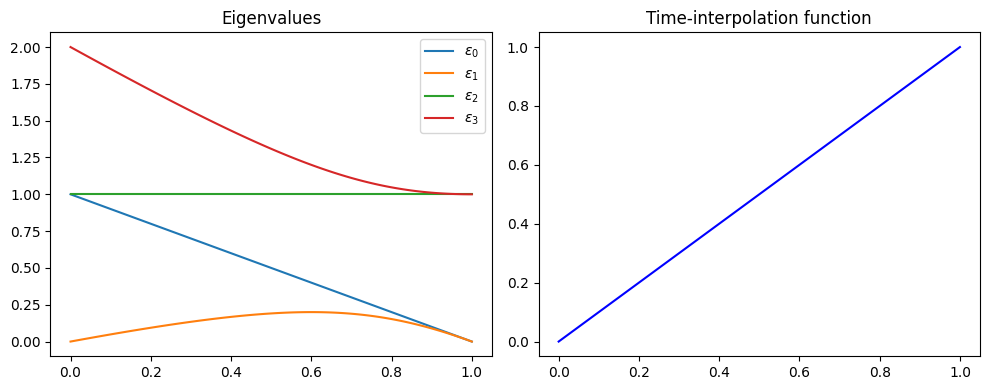

In [16]:
tt = adiabaticPath(realtime)

eigenH0 = H(0).eigenvals(0)

for e in eigenH0.keys():
    print("Eigenvalues: ", e, " | Multiplicity: ",  eigenH0[e])
    
eigenvalsH = eigenValues(tt)
runPlot(realtime, eigenvalsH)

### Example 2

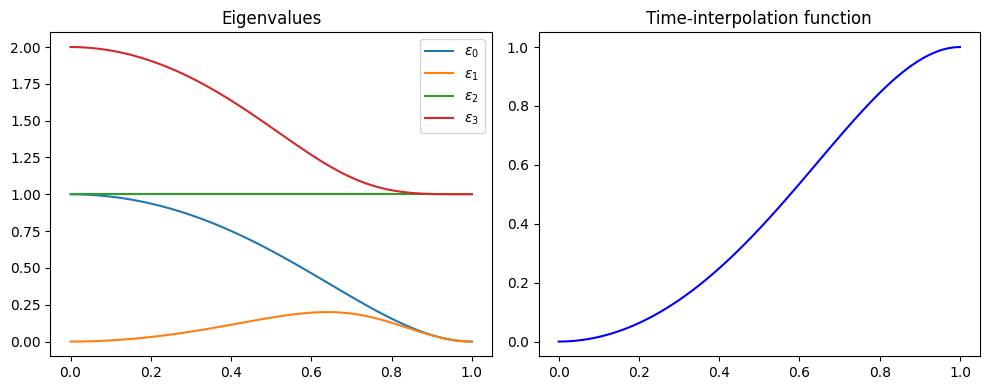

In [17]:
def adiabaticPath(realtime):
    return sym.sin(realtime**2*sym.pi/2.)

tt = [adiabaticPath(t) for t in realtime]
eigenvalsH = eigenValues(tt)
runPlot(realtime, eigenvalsH)

# Warning: a note on commuting Hamiltonians

In [18]:
H0 = sym.Matrix([[1, 0],  [0, -1]])
HF = sym.Matrix([[-2, 0],  [0, -1]])

def H(t, T):
    return (1-t/T)*H0 + (t/T)*HF

sym.pprint(H0)
sym.pprint(HF)

⎡1  0 ⎤
⎢     ⎥
⎣0  -1⎦
⎡-2  0 ⎤
⎢      ⎥
⎣0   -1⎦


#### Compute the Lie bracket

Lie bracket $[H_0, H_F] := H_0 H_F - H_F H_0$


In [19]:
sym.pprint(H0*HF - HF*H0)

⎡0  0⎤
⎢    ⎥
⎣0  0⎦


In [20]:
print("Eigenvalues, eigenvectors of H0: ")
ev = H0.eigenvects()
sym.pprint(ev)

print("  ")
print("Eigenvalues, eigenvectors of HF: ")
ev = HF.eigenvects()
sym.pprint(ev)

Eigenvalues, eigenvectors of H0: 
⎡⎛       ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢ ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0⎦⎦⎠⎦
  
Eigenvalues, eigenvectors of HF: 
⎡⎛       ⎡⎡1⎤⎤⎞  ⎛       ⎡⎡0⎤⎤⎞⎤
⎢⎜-2, 1, ⎢⎢ ⎥⎥⎟, ⎜-1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣0⎦⎦⎠  ⎝       ⎣⎣1⎦⎦⎠⎦


The minimum runtime is given by 
$$
T \geq \max_{t}\frac{\|H_T - H_0\|^2}{\varepsilon S_{gap}(t)^3},
$$
where $S_{gap}$ denotes the spectral gap, and $\varepsilon$ is a tolerance level such that
$$
\sqrt{\langle \psi_0|\psi_{F} \rangle} \leq \varepsilon.
$$

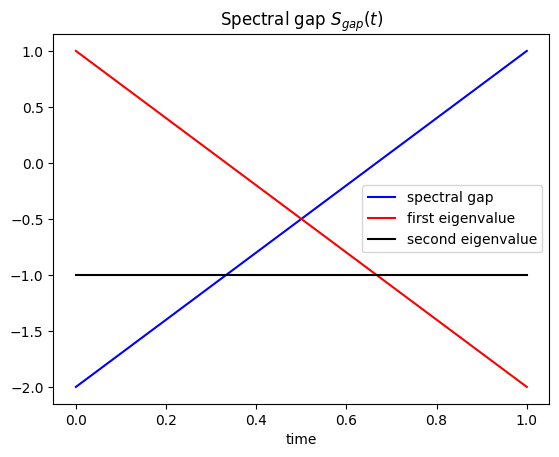

In [21]:
T = 1.
tt = np.linspace(0., T, 20)
spectralgap, eigvals0, eigvals1 = [], [], []

for t in tt:
    Ht = H(t, T)
    ev = Ht.eigenvals() ## returns the eigenvalues with their algebraic multiplicities
    listeigenvals = list(ev.keys())
    eigvals0.append(listeigenvals[0])
    eigvals1.append(listeigenvals[1])
    spectralgap.append(listeigenvals[1] - listeigenvals[0])

plt.plot(tt, spectralgap, 'b', label="spectral gap")
plt.plot(tt, eigvals0, 'r', label="first eigenvalue")
plt.plot(tt, eigvals1, 'k', label="second eigenvalue")
plt.title("Spectral gap $S_{gap}(t)$")
plt.legend(loc="best")
plt.xlabel("time")
plt.show()